<a href="https://colab.research.google.com/github/tamer-elkoT/my_projects1/blob/main/Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
credit_record = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_project/credit_record.csv")

application_record = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_project/application_record.csv")

In [ ]:
credit_record.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_record["STATUS"].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [ ]:
print("Application Records:", application_record.shape)
print("Credit Records:", credit_record.shape)

Application Records: (438557, 18)
Credit Records: (1048575, 3)


In [ ]:
# Check unique IDs in application_record.csv
unique_ids_application = application_record['ID'].nunique()
print("Unique IDs in Application Records:", unique_ids_application)

# Check unique IDs in credit_record.csv
unique_ids_credit = credit_record['ID'].nunique()
print("Unique IDs in Credit Records:", unique_ids_credit)

Unique IDs in Application Records: 438510
Unique IDs in Credit Records: 45985


In [ ]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
print("Duplicate IDs in Application Records:", application_record['ID'].duplicated().sum())

Duplicate IDs in Application Records: 47


Find duplicate IDs

In [ ]:
duplicate_ids = application_record[application_record.duplicated(subset="ID",keep=False)]
duplicate_ids = duplicate_ids.sort_values(by="ID")
duplicate_ids

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


we will group the credit record data based on the ID column >>Knowning that each applicant could have multiple IDs each ID represent the number of months of the credit history however if the applicant has a 24 months it means that it will have 24 rows with the same ID

In [ ]:
duplicated_counts = application_record["ID"].value_counts()
duplicated_counts[duplicated_counts > 1]

,count
ID,
7137299,2
7702238,2
7282535,2
7243768,2
7050948,2
7602432,2
7036518,2
7045885,2
7618285,2


In [ ]:
# Group by ID and compare rows
for id_value,group in duplicate_ids.groupby("ID"):
    print(f"Rows for ID {id_value}:")
    print(group)

    if group.duplicated(keep=False).all():
        print("All rows are identical.\n")
    else:
        print("Rows are different.\n")

Rows for ID 7022197:
             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
426818  7022197           M            Y               Y             3   
425023  7022197           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
426818          135000.0               Working  Secondary / secondary special   
425023          450000.0  Commercial associate               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
426818            Married  House / apartment      -11945           -735   
425023          Separated  House / apartment      -19813          -1799   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
426818           1                0           0           1        Laborers   
425023           1                0           0           1             NaN   

        CNT_FAM_MEMBERS  
426818              5.

In [ ]:
# Keep the first occurrence of each ID
application_record = application_record.drop_duplicates(subset='ID', keep='first')

In [ ]:
# Check for duplicate IDs
duplicate_ids = application_record['ID'].duplicated().sum()
print("Number of duplicate IDs after removal:", duplicate_ids)

Number of duplicate IDs after removal: 0


Credit age :
Credit age (or credit history length) refers to how long you’ve been using credit. It’s essentially the length of time since you opened your first credit account (e.g., credit card, loan, etc.) until now.

Think of it like this:

If you opened your first credit card 5 years ago, your credit age is 5 years.

If you opened your first loan 10 years ago, your credit age is 10 years.

Credit Record  the credit record is represented by monthly records for each applicant (ID). Each row in credit_record.csv corresponds to a specific month’s credit behavior for an applicant.


In [ ]:
# Aggregate credit records
credit_agg = credit_record.groupby('ID').agg(
    total_months=('STATUS', 'count'),  # Total months of credit history >>Total of rows in the credit history
    late_payments=('STATUS', lambda x: (x.isin(['0', '1', '2', '3', '4', '5'])).sum()),  # Count late payments
    defaults=('STATUS', lambda x: (x == '5').sum()),  # Count defaults
    credit_age_months=('MONTHS_BALANCE', lambda x: x.max() - x.min())  # Credit age in months
).reset_index()


## Total_months VS Credit_age_months
total_months:
Counts the number of months for which credit records exist.

credit_age_months:
Measures the time span between the oldest and most recent records

total_months:

Tells you how much credit history data is available for the applicant.

For example, if total_months is low, the applicant might have a limited credit history.

credit_age_months:

Tells you how long the applicant has been using credit.

For example, if credit_age_months is high, the applicant has a long credit history, which is generally viewed positively by lenders.

In [ ]:
application_record.columns


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
credit_agg.head()

,ID,total_months,late_payments,defaults,credit_age_months
0,5001711,4,3,0,3
1,5001712,19,10,0,18
2,5001713,22,0,0,21
3,5001714,15,0,0,14
4,5001715,60,0,0,59


In [ ]:
credit_agg.shape

(45985, 5)

In [ ]:
application_record.shape


(438510, 18)

The Mismatch problem . If an applicant exists in application_record but not in credit_agg (i.e., they have no credit history), the columns from credit_agg will have missing values (NaN) for that row.

In [ ]:
# Merge the two datasets
merged_data = application_record.merge(credit_agg, on="ID",how="left")
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,16.0,2.0,0.0,15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,15.0,2.0,0.0,14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,30.0,7.0,0.0,29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,5.0,2.0,0.0,4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,5.0,0.0,0.0,4.0


In [ ]:
# Define the target variable
def define_target(status_series):
  # If the applicant has ever defaulted
  if (status_series == "5").any():
    return "bad"
  # If the applicant has more than 2 late payments
  elif (status_series.isin(['0', '1', '2', '3', '4'])).sum() > 2 :
    return "bad"
  else:
    return "good"


In [ ]:
# Apply the function to each applicant
target = credit_record.groupby("ID")["STATUS"].apply(define_target)

In [ ]:
# Merge the target variable with the application data
merged_data["TARGET"] = merged_data["ID"].map(target)


In [ ]:
merged_data["TARGET"].value_counts()

,count
TARGET,
bad,28113
good,8344


In [ ]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,16.0,2.0,0.0,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,15.0,2.0,0.0,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,30.0,7.0,0.0,29.0,bad
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,5.0,2.0,0.0,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,5.0,0.0,0.0,4.0,good


## Handle Missing data for applicants with no credit history

In [ ]:
merged_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


Why Are There So Many Missing Values?
The large number of missing values in total_months, late_payments, defaults, credit_age_months, and TARGET is because:

392,525 applicants have no credit history, so their credit-related columns will have missing values after merging.

This is expected behavior because not all applicants will have credit history records.

In [ ]:
# Handling missing values in Occupation type column
merged_data["OCCUPATION_TYPE"].fillna("Unkown",inplace = True)

<ipython-input-26-b32a69b597b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["OCCUPATION_TYPE"].fillna("Unkown",inplace = True)


Fill credit-related columns with 0

In [ ]:
# Fill missing values for applicants with no credit history
credit_history_columns = ["total_months", "late_payments", "defaults", "credit_age_months"]
for col in credit_history_columns:
  merged_data[col].fillna(0,inplace = True)



<ipython-input-27-b3b16468521f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(0,inplace = True)


In [ ]:
merged_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


# assume applicants with no credit history are low-risk

In [ ]:
# Fill Nan values in the target column with "good"
merged_data["TARGET"].fillna("good",inplace =True)

<ipython-input-29-9da816fa2d69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["TARGET"].fillna("good",inplace =True)


In [ ]:
merged_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
merged_data["TARGET"].value_counts()

,count
TARGET,
good,410397
bad,28113


## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = merged_data.drop(["ID","TARGET"],axis = 1)
y = merged_data["TARGET"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify=y)

<ipython-input-34-748e1abae560>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])


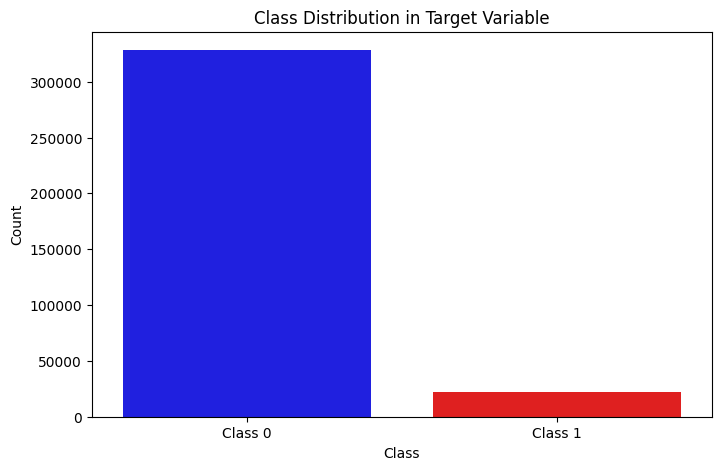

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each class
class_counts = y_train.value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.show()


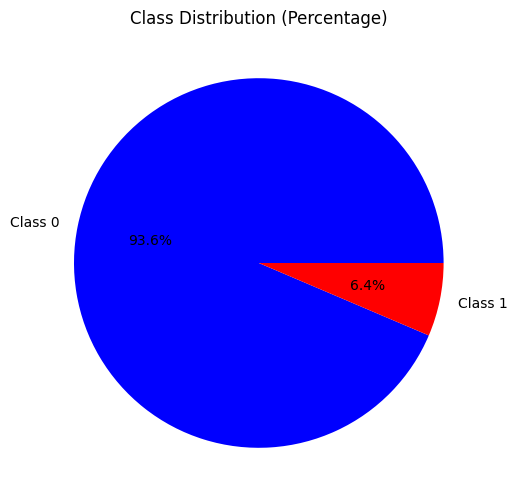

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=["Class 0", "Class 1"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Class Distribution (Percentage)")
plt.show()

## Feature Engineering

In [ ]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unkown,2.0,16.0,2.0,0.0,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unkown,2.0,15.0,2.0,0.0,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,30.0,7.0,0.0,29.0,bad
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,5.0,2.0,0.0,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,5.0,0.0,0.0,4.0,good


In [ ]:
merged_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'total_months',
       'late_payments', 'defaults', 'credit_age_months', 'TARGET'],
      dtype='object')

Age: Convert DAYS_BIRTH to years

In [ ]:
merged_data["AGE"] = abs(merged_data["DAYS_BIRTH"])/365

Convert DAYS_EMPLOYED to years

In [ ]:
merged_data["YEARS_EMPLOYED"] = abs(merged_data["DAYS_EMPLOYED"])/365

 Calculate income per family member:

In [ ]:
merged_data["INCOME_PER_FAMILY_MEMBER"] = merged_data["AMT_INCOME_TOTAL"]/merged_data["CNT_FAM_MEMBERS"]

## Drop Unnecessary columns

In [ ]:
merged_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis =1 , inplace = True)

In [ ]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,TARGET,AGE,YEARS_EMPLOYED,INCOME_PER_FAMILY_MEMBER
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Unkown,2.0,16.0,2.0,0.0,15.0,good,32.890411,12.443836,213750.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Unkown,2.0,15.0,2.0,0.0,14.0,good,32.890411,12.443836,213750.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2.0,30.0,7.0,0.0,29.0,bad,58.832877,3.106849,56250.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,5.0,2.0,0.0,4.0,good,52.356164,8.358904,270000.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,5.0,0.0,0.0,4.0,good,52.356164,8.358904,270000.0


## Encoding the categorical features

In [ ]:
merged_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'total_months', 'late_payments', 'defaults',
       'credit_age_months', 'TARGET', 'AGE', 'YEARS_EMPLOYED',
       'INCOME_PER_FAMILY_MEMBER'],
      dtype='object')

For 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' columns

In [ ]:
merged_data["CODE_GENDER"].value_counts()


,count
CODE_GENDER,
F,294406
M,144104


In [ ]:
# Define mappings for each column
gender_mapping = {'M': 1, 'F': 0}
car_mapping = {'Y': 1, 'N': 0}
realty_mapping = {'Y': 1, 'N': 0}

In [ ]:
# Apply the mappings to the columns
X_train['CODE_GENDER'] = X_train['CODE_GENDER'].apply(lambda x: gender_mapping[x])
X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].apply(lambda x: car_mapping[x])
X_train['FLAG_OWN_REALTY'] = X_train['FLAG_OWN_REALTY'].apply(lambda x: realty_mapping[x])

# Apply the same mappings to the test set
X_test['CODE_GENDER'] = X_test['CODE_GENDER'].apply(lambda x: gender_mapping[x])
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].apply(lambda x: car_mapping[x])
X_test['FLAG_OWN_REALTY'] = X_test['FLAG_OWN_REALTY'].apply(lambda x: realty_mapping[x])

In [ ]:
X_train["FLAG_OWN_REALTY"].value_counts()

,count
FLAG_OWN_REALTY,
1,243243
0,107565


In [ ]:
X_train["CNT_CHILDREN"].value_counts()

,count
CNT_CHILDREN,
0,243090
1,70951
2,31935
3,4326
4,376
5,109
7,6
12,4
6,4


Remove childern that are higher than 5

In [ ]:
# Remove rows where CNT_CHILDREN > 5
X_train = X_train[X_train['CNT_CHILDREN'] <= 5]
y_train = y_train[X_train.index]  # Ensure the target variable is also filtered

In [ ]:
print("Value counts after removal:")
print(X_train["CNT_CHILDREN"].value_counts())

Value counts after removal:
CNT_CHILDREN
0    243090
1     70951
2     31935
3      4326
4       376
5       109
Name: count, dtype: int64


In [ ]:
X_train["NAME_INCOME_TYPE"].value_counts()

,count
NAME_INCOME_TYPE,
Working,181034
Commercial associate,80568
Pensioner,60146
State servant,29023
Student,16


In [ ]:
# Remove rows where NAME_INCOME_TYPE is "Student"
X_train = X_train[X_train['NAME_INCOME_TYPE'] != 'Student']
y_train = y_train[X_train.index]  # Ensure the target variable is also filtered

X_test = X_test[X_test['NAME_INCOME_TYPE'] != 'Student']
y_test = y_test[X_test.index]  # Ensure the target variable is also filtered

In [ ]:
X_train.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'total_months',
       'late_payments', 'defaults', 'credit_age_months'],
      dtype='object')

In [ ]:
# One-hot encode NAME_INCOME_TYPE
X_train = pd.get_dummies(X_train, columns=['NAME_INCOME_TYPE'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['NAME_INCOME_TYPE'], drop_first=True)

In [ ]:
# Ensure X_train and X_test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
X_train["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,241403
Higher education,93984
Incomplete higher,11876
Lower secondary,3249
Academic degree,259


In [ ]:
X_train = X_train[X_train['NAME_EDUCATION_TYPE'] != 'Academic degree']
y_train = y_train[X_train.index]  # Ensure the target variable is also filtered

X_test = X_test[X_test['NAME_EDUCATION_TYPE'] != 'Academic degree']
y_test = y_test[X_test.index]

In [ ]:
X_train["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,241403
Higher education,93984
Incomplete higher,11876
Lower secondary,3249


In [ ]:
# Define the order of categories
education_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education']

# Create a mapping dictionary
education_mapping = {level: i for i, level in enumerate(education_order)}

# Apply ordinal encoding
X_train['NAME_EDUCATION_TYPE'] = X_train['NAME_EDUCATION_TYPE'].map(education_mapping)
X_test['NAME_EDUCATION_TYPE'] = X_test['NAME_EDUCATION_TYPE'].map(education_mapping)

In [ ]:
X_train["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
1,241403
3,93984
2,11876
0,3249


In [ ]:
X_train["NAME_FAMILY_STATUS"].value_counts()

,count
NAME_FAMILY_STATUS,
Married,239612
Single / not married,44273
Civil marriage,29167
Separated,21740
Widow,15720


In [ ]:
# Using one-hot encoding
X_train = pd.get_dummies(X_train, columns = ["NAME_FAMILY_STATUS"],drop_first= True)
X_test = pd.get_dummies(X_test,columns = ["NAME_FAMILY_STATUS"],drop_first=True)


In [ ]:
X_train["NAME_HOUSING_TYPE"].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,314656
With parents,15327
Municipal apartment,11411
Rented apartment,4768
Office apartment,3114
Co-op apartment,1236


In [ ]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,late_payments,defaults,credit_age_months,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
313835,0,0,1,0,135000.0,1,House / apartment,-9982,-1366,1,...,0.0,0.0,0.0,False,False,True,False,True,False,False
178126,0,1,1,1,112500.0,1,House / apartment,-11889,-749,1,...,0.0,0.0,0.0,False,False,True,True,False,False,False
106183,1,1,1,0,315000.0,3,House / apartment,-13998,-824,1,...,0.0,0.0,0.0,False,False,False,False,False,False,False
355148,1,0,1,0,168750.0,1,House / apartment,-8542,-845,1,...,0.0,0.0,0.0,False,False,True,False,False,True,False
16606,1,1,1,1,292500.0,3,House / apartment,-12569,-3322,1,...,0.0,0.0,38.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373584,0,1,1,0,261000.0,3,House / apartment,-10254,-1152,1,...,0.0,0.0,0.0,False,False,True,True,False,False,False
377628,0,0,1,0,225000.0,1,House / apartment,-22083,365243,1,...,0.0,0.0,0.0,True,False,False,True,False,False,False
61441,1,1,1,1,292500.0,3,House / apartment,-12595,-1966,1,...,0.0,0.0,0.0,False,False,False,True,False,False,False
359706,0,0,1,0,112500.0,1,House / apartment,-23555,365243,1,...,0.0,0.0,0.0,True,False,False,False,False,False,True


In [ ]:
# Group by housing type and calculate mean income
housing_income = X_train.groupby("NAME_HOUSING_TYPE")["AMT_INCOME_TOTAL"].mean().sort_values(ascending=False)

# Display the result
print("Mean Income by Housing Type:")
print(housing_income)

Mean Income by Housing Type:
NAME_HOUSING_TYPE
Office apartment       216383.959538
Co-op apartment        191707.645631
Rented apartment       191513.022546
Municipal apartment    188756.819779
House / apartment      187417.985652
With parents           178138.323946
Name: AMT_INCOME_TOTAL, dtype: float64


<ipython-input-66-e46510110a2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_income.index, y=housing_income.values, palette="viridis")


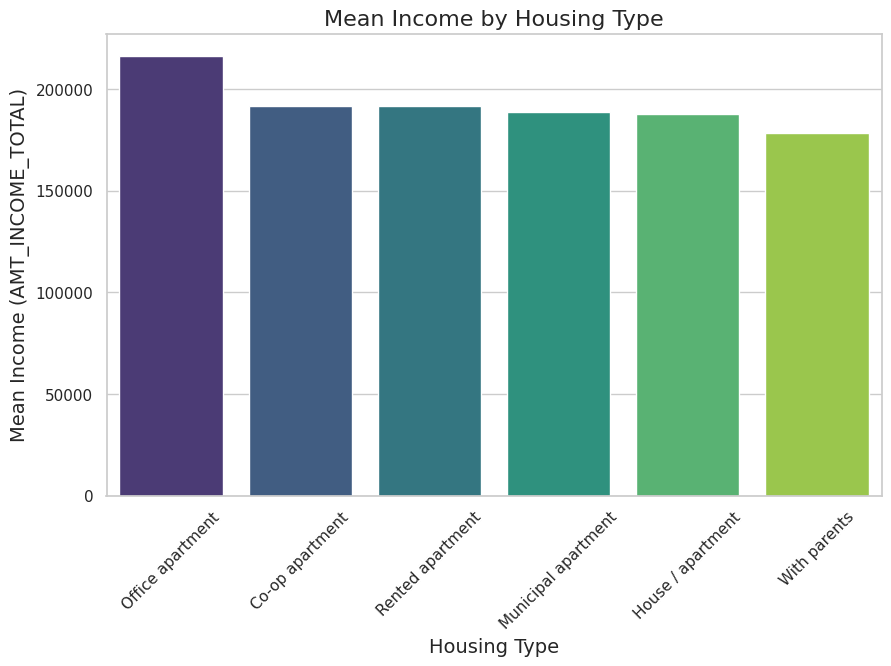

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=housing_income.index, y=housing_income.values, palette="viridis")
plt.title("Mean Income by Housing Type", fontsize=16)
plt.xlabel("Housing Type", fontsize=14)
plt.ylabel("Mean Income (AMT_INCOME_TOTAL)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train["OCCUPATION_TYPE"].value_counts()


,count
OCCUPATION_TYPE,
Unkown,107203
Laborers,62557
Core staff,34363
Sales staff,32848
Managers,28268
Drivers,20897
High skill tech staff,13799
Accountants,12748
Medicine staff,10832


In [ ]:
y_train


,TARGET
313835,good
178126,good
106183,good
355148,good
16606,good
...,...
373584,good
377628,good
61441,good
359706,good


In [ ]:
target_mapping = {'good':0,"bad":1}
y_train_numeric = y_train.map(target_mapping)
y_test_numeric = y_test.map(target_mapping)

In [ ]:
skill_level_mapping = {
    "Laborers": "Low Skill",
    "Low-skill Laborers": "Low Skill",
    "Cleaning staff": "Low Skill",
    "Cooking staff": "Low Skill",
    "Security staff": "Low Skill",
    "Waiters/barmen staff": "Low Skill",
    "Core staff": "Medium Skill",
    "Sales staff": "Medium Skill",
    "Drivers": "Medium Skill",
    "Secretaries": "Medium Skill",
    "Private service staff": "Medium Skill",
    "Managers": "High Skill",
    "High skill tech staff": "High Skill",
    "Accountants": "High Skill",
    "Medicine staff": "High Skill",
    "Realty agents": "High Skill",
    "HR staff": "High Skill",
    "IT staff": "High Skill",
    "Unknown": "Unknown"
}

In [ ]:
X_train["SKILL_LEVEL"] = X_train["OCCUPATION_TYPE"].map(skill_level_mapping)
X_test["SKILL_LEVEL"] = X_test["OCCUPATION_TYPE"].map(skill_level_mapping)

In [ ]:
temp_df=X_train.copy()
temp_df["TARGET"] = y_train_numeric

<ipython-input-73-839f14138554>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_level_target.index,y=skill_level_target.values,palette="viridis")


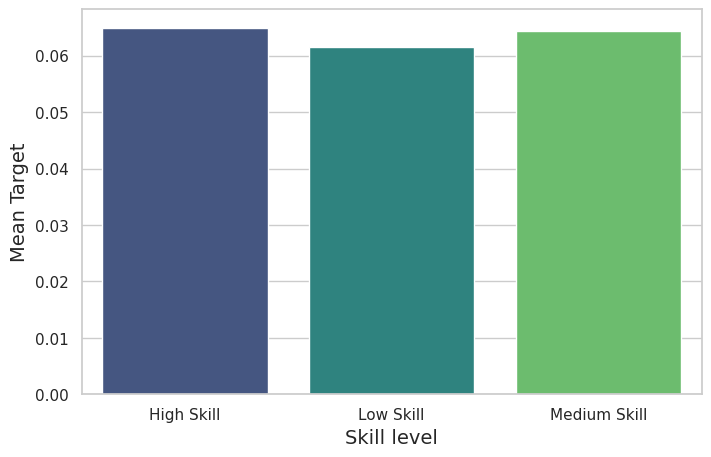

In [ ]:
skill_level_target = temp_df.groupby("SKILL_LEVEL")["TARGET"].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=skill_level_target.index,y=skill_level_target.values,palette="viridis")
plt.xlabel("Skill level",fontsize =14)
plt.ylabel("Mean Target",fontsize =14)
plt.show()

In [ ]:
X_train["SKILL_LEVEL"].value_counts()

,count
SKILL_LEVEL,
Medium Skill,92544
Low Skill,83137
High Skill,67628


In [ ]:
skill_level_mapping = {
    "Low Skill": 0,
    "Medium Skill": 1,
    "High Skill": 2
}

In [ ]:
X_train["SKILL_LEVEL_encoded"] = X_train["SKILL_LEVEL"].map(skill_level_mapping)
X_test["SKILL_LEVEL_encoded"] = X_test["SKILL_LEVEL"].map(skill_level_mapping)

In [ ]:
X_train = X_train.drop(["OCCUPATION_TYPE","SKILL_LEVEL"],axis = 1)
X_test = X_test.drop(["OCCUPATION_TYPE","SKILL_LEVEL"],axis = 1)

In [ ]:
X_train.dtypes

,0
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_EDUCATION_TYPE,int64
NAME_HOUSING_TYPE,object
DAYS_BIRTH,int64
DAYS_EMPLOYED,int64
FLAG_MOBIL,int64


In [ ]:
X_train["NAME_HOUSING_TYPE"].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,314656
With parents,15327
Municipal apartment,11411
Rented apartment,4768
Office apartment,3114
Co-op apartment,1236


In [ ]:
X_train_encoded = pd.get_dummies(X_train,columns=["NAME_HOUSING_TYPE"],drop_first=True)
X_test_encoded = pd.get_dummies(X_test,columns=["NAME_HOUSING_TYPE"],drop_first=True)

In [ ]:
X_train_encoded.dtypes

,0
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_EDUCATION_TYPE,int64
DAYS_BIRTH,int64
DAYS_EMPLOYED,int64
FLAG_MOBIL,int64
FLAG_WORK_PHONE,int64


In [ ]:
X_train_encoded.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,SKILL_LEVEL_encoded,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
313835,0,0,1,0,135000.0,1,-9982,-1366,1,0,...,False,True,False,False,0.0,True,False,False,False,False
178126,0,1,1,1,112500.0,1,-11889,-749,1,0,...,True,False,False,False,NaN,True,False,False,False,False
106183,1,1,1,0,315000.0,3,-13998,-824,1,1,...,False,False,False,False,2.0,True,False,False,False,False
355148,1,0,1,0,168750.0,1,-8542,-845,1,1,...,False,False,True,False,0.0,True,False,False,False,False
16606,1,1,1,1,292500.0,3,-12569,-3322,1,0,...,True,False,False,False,NaN,True,False,False,False,False


In [ ]:
X_train_encoded.describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,SKILL_LEVEL_encoded
count,350512.000000,350512.000000,350512.000000,350512.000000,3.505120e+05,350512.000000,350512.000000,350512.000000,350512.0,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,243309.000000
mean,0.328579,0.372196,0.693289,0.427281,1.873840e+05,1.560880,-15990.698997,60347.471473,1.0,0.206173,0.287616,0.107857,2.194170,1.763748,0.687426,0.003395,1.680699,0.936258
std,0.469697,0.483391,0.461129,0.721128,1.095961e+05,0.895043,4184.450954,138576.792206,0.0,0.404557,0.452652,0.310200,0.894346,7.257585,3.250078,0.251621,7.036629,0.784591
min,0.000000,0.000000,0.000000,0.000000,2.610000e+04,0.000000,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,-19470.000000,-3101.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,1.000000,-15622.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,-12510.000000,-373.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000,6.750000e+06,3.000000,-7678.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,61.000000,61.000000,48.000000,60.000000,2.000000


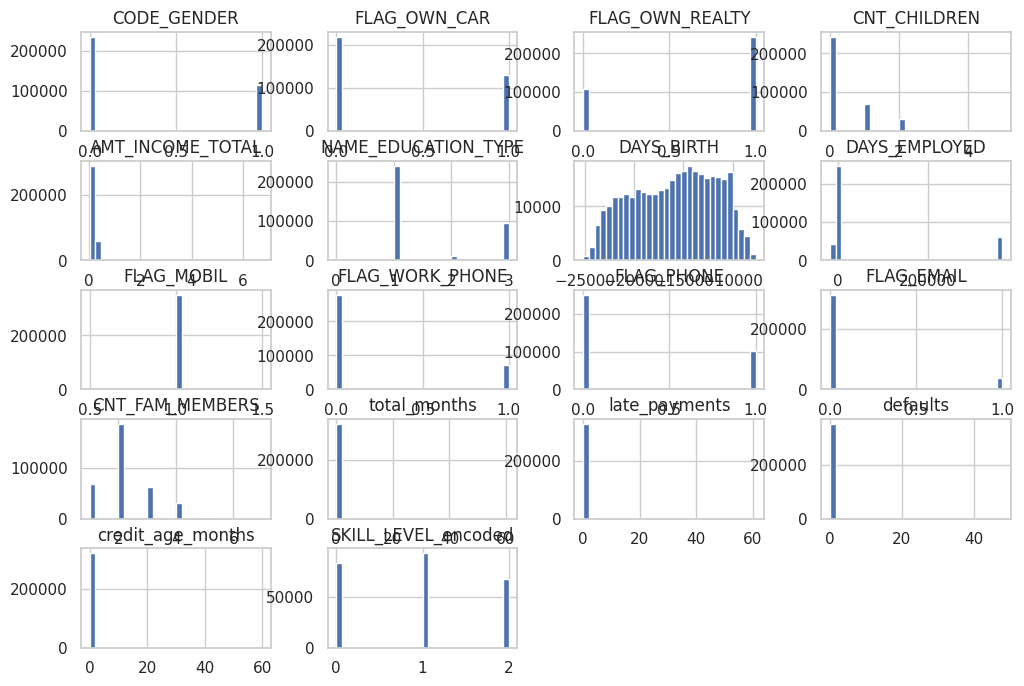

In [ ]:
X_train_encoded.hist(figsize=(12,8),bins=30)
plt.show()

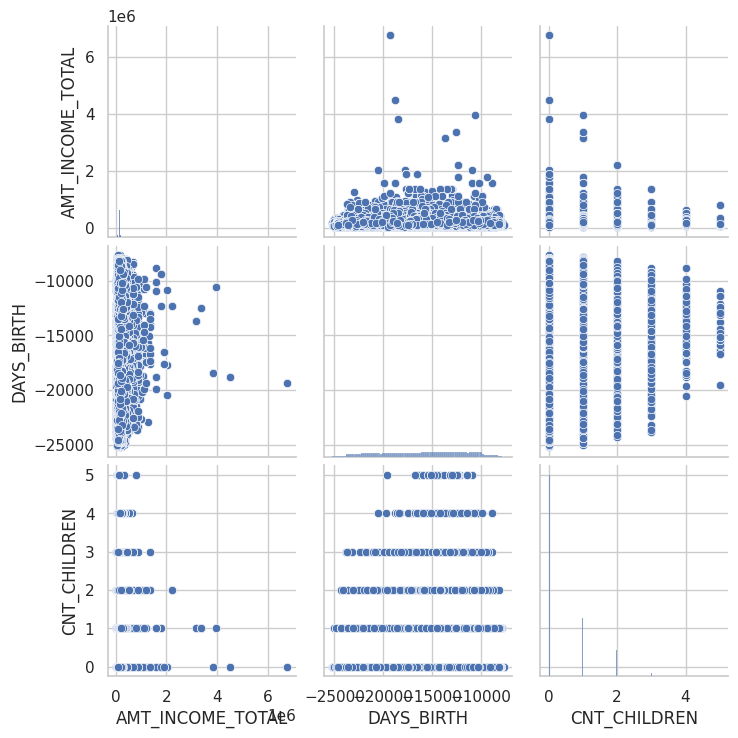

In [ ]:
sns.pairplot(X_train_encoded[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "CNT_CHILDREN"]])
plt.show()


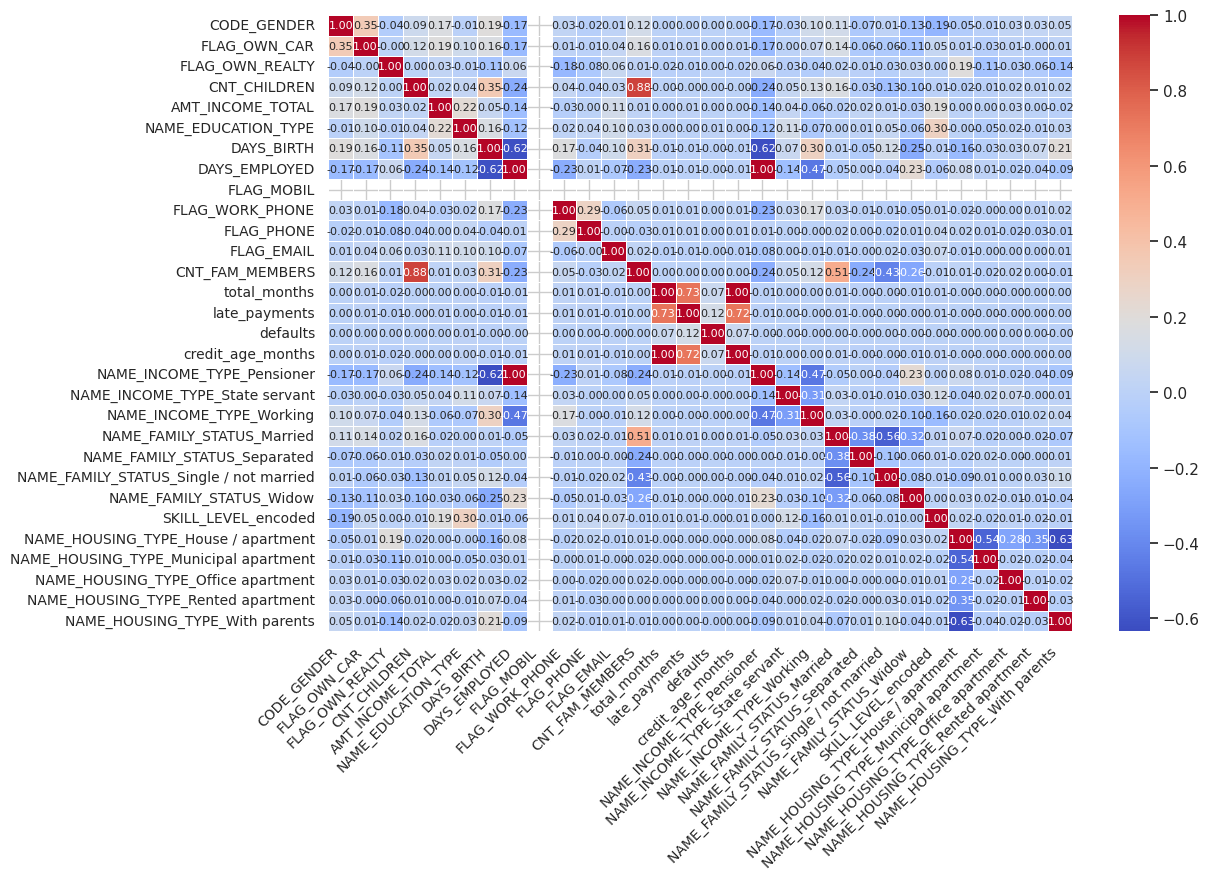

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_encoded.corr(), annot=True,fmt=".2f", cmap='coolwarm',linewidths=0.5,annot_kws={"size":8})
plt.xticks(rotation=45,ha="right",fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
X_train_encoded.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
FLAG_MOBIL,0
FLAG_WORK_PHONE,0


In [ ]:
median_value = X_train_encoded["SKILL_LEVEL_encoded"].median()
X_train_encoded["SKILL_LEVEL_encoded"].fillna(median_value,inplace = True)

<ipython-input-88-ab30bfbeba37>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_encoded["SKILL_LEVEL_encoded"].fillna(median_value,inplace = True)


In [ ]:
X_train_encoded.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
FLAG_MOBIL,0
FLAG_WORK_PHONE,0


Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns= X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns= X_test_encoded.columns)

In [ ]:
X_train_scaled.describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,SKILL_LEVEL_encoded,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
count,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.0,350512.000000,...,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000,350512.000000
mean,0.328579,0.372196,0.693289,0.085456,0.023987,0.520293,0.525612,0.203458,0.0,0.206173,...,0.683606,0.062024,0.126310,0.044849,0.477877,0.897704,0.032555,0.008884,0.013603,0.043727
std,0.469697,0.483391,0.461129,0.144226,0.016299,0.298348,0.238798,0.362033,0.0,0.404557,...,0.465069,0.241199,0.332198,0.206972,0.327174,0.303038,0.177470,0.093836,0.115836,0.204488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.014188,0.333333,0.327056,0.037698,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.019542,0.333333,0.546653,0.041967,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.200000,0.029581,1.000000,0.724248,0.044825,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_scaled.shape

(350512, 30)

In [ ]:
y_train_numeric.shape

(350512,)

In [ ]:
X_test_scaled.shape

(87648, 30)

Fixing the Issue of imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy = "auto",random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train_numeric)

<ipython-input-98-f0742b210216>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_after_resample.index, y=class_counts_after_resample.values, palette=["blue", "red"])


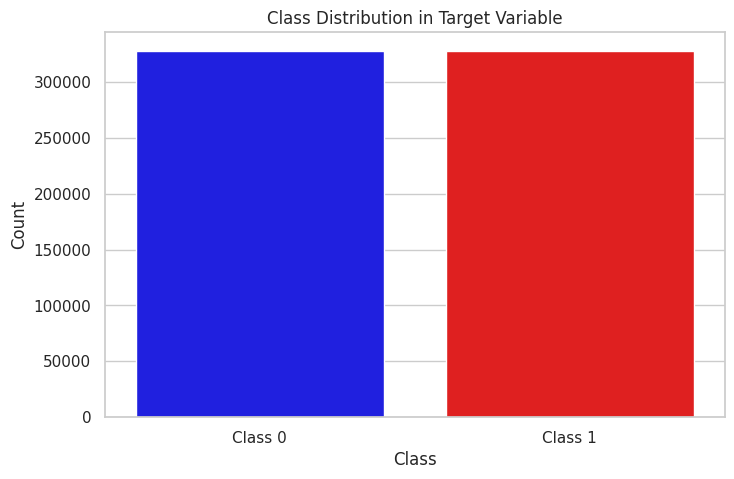

In [ ]:

# Count the number of occurrences of each class
class_counts_after_resample = y_train_resampled.value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts_after_resample.index, y=class_counts_after_resample.values, palette=["blue", "red"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.show()

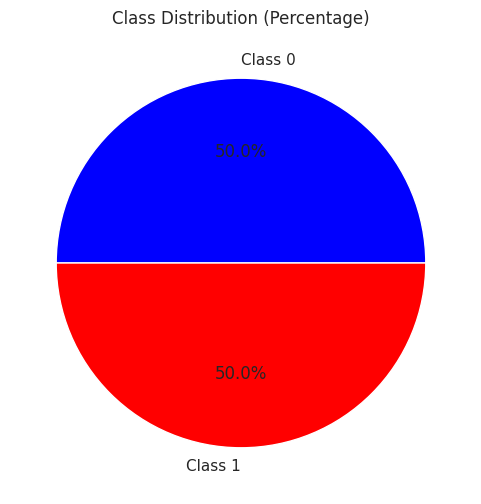

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts_after_resample, labels=["Class 0", "Class 1"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Class Distribution (Percentage)")
plt.show()

Building a neural network using Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# # Split the training data into train and validation sets (80% train, 20% validation)
# X_train_final, X_val, y_train_final, y_val = train_test_split(
#     X_train_scaled, y_train_numeric, test_size=0.2, random_state=42
# )

In [ ]:
# Split the training data into train and validation sets (80% train, 20% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,SKILL_LEVEL_encoded,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0.0,0.0,1.0,0.0,0.016196,0.333333,0.868516,0.042231,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.2,0.012850,0.333333,0.759687,0.043843,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.042966,1.000000,0.639331,0.043647,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.021215,0.333333,0.950693,0.043592,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.2,0.039620,1.000000,0.720881,0.037121,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350507,0.0,1.0,1.0,0.0,0.034935,1.000000,0.852993,0.042790,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
350508,0.0,0.0,1.0,0.0,0.029581,0.333333,0.177938,1.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
350509,1.0,1.0,1.0,0.2,0.039620,1.000000,0.719397,0.040664,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
350510,0.0,0.0,1.0,0.0,0.012850,0.333333,0.093934,1.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0


Convert Data to PyTorch Tensors

In [ ]:
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [ ]:
y_train_tensor = y_train_tensor.view(-1, 1)  # Reshape to (N, 1)
y_val_tensor = y_val_tensor.view(-1, 1)  # Reshape validation target as well


In [ ]:
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numeric.values, dtype=torch)

In [ ]:
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
val_dataset = TensorDataset(X_val_tensor,y_val_tensor)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle= True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # First hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)  # Second hidden layer
        self.fc3 = nn.Linear(32, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_size = X_train_tensor.shape[1]  # Should be 30 based on your data
model = NeuralNet(input_size)

In [ ]:
criterion = nn.BCELoss()  # Binary cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay = 1e-5)


In [ ]:
print(model)


NeuralNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
# Early Stopping Parameters
patience = 5  # Stop training if no improvement for 5 epochs
best_val_loss = float("inf")  # Track the best validation loss
epochs_no_improve = 0  # Count epochs without improvement

num_epochs = 50  # You can increase this
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()

    # Forward pass
    y_train_pred = model(X_train_tensor)
    loss = criterion(y_train_pred, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Evaluate on validation set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_loss = criterion(y_val_pred, y_val_tensor)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early Stopping Logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update best validation loss
        epochs_no_improve = 0  # Reset patience counter
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        epochs_no_improve += 1  # Increment patience counter

    if epochs_no_improve == patience:
        print("Early stopping triggered! Stopping training.")
        break  # Stop training

# Load the best model
model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded.")

Epoch 1/50, Train Loss: 0.6973, Validation Loss: 0.6961
Epoch 2/50, Train Loss: 0.6958, Validation Loss: 0.6947
Epoch 3/50, Train Loss: 0.6944, Validation Loss: 0.6933
Epoch 4/50, Train Loss: 0.6930, Validation Loss: 0.6919
Epoch 5/50, Train Loss: 0.6917, Validation Loss: 0.6906
Epoch 6/50, Train Loss: 0.6904, Validation Loss: 0.6892
Epoch 7/50, Train Loss: 0.6891, Validation Loss: 0.6879
Epoch 8/50, Train Loss: 0.6878, Validation Loss: 0.6866
Epoch 9/50, Train Loss: 0.6865, Validation Loss: 0.6853
Epoch 10/50, Train Loss: 0.6852, Validation Loss: 0.6840
Epoch 11/50, Train Loss: 0.6839, Validation Loss: 0.6827
Epoch 12/50, Train Loss: 0.6826, Validation Loss: 0.6813
Epoch 13/50, Train Loss: 0.6813, Validation Loss: 0.6800
Epoch 14/50, Train Loss: 0.6799, Validation Loss: 0.6785
Epoch 15/50, Train Loss: 0.6785, Validation Loss: 0.6770
Epoch 16/50, Train Loss: 0.6770, Validation Loss: 0.6754
Epoch 17/50, Train Loss: 0.6754, Validation Loss: 0.6738
Epoch 18/50, Train Loss: 0.6738, Validat

<ipython-input-110-96e560523e30>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


In [ ]:
# # Training loop with validation
# num_epochs = 10

# for epoch in range(num_epochs):
#     model.train()  # Set model to training mode
#     train_loss = 0.0

#     for X_batch, y_batch in train_loader:
#         optimizer.zero_grad()
#         outputs = model(X_batch).squeeze()  # Ensure output matches y_batch shape
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     train_loss /= len(train_loader)

#     # Validation phase
#     model.eval()  # Set model to evaluation mode
#     val_loss = 0.0

#     with torch.no_grad():
#         for X_val_batch, y_val_batch in val_loader:
#             val_outputs = model(X_val_batch).squeeze()
#             val_loss += criterion(val_outputs, y_val_batch).item()

#     val_loss /= len(val_loader)

#     print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Define loss function


Train the model


In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = model(X_val_tensor).detach().numpy()
y_val_pred = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary labels
accuracy = accuracy_score(y_val.values, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

#Validation Accuracy: 0.9357

Validation Accuracy: 0.8870


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

# Before resampling
#        precision    recall  f1-score   support

#            0       0.94      1.00      0.97     65592
#            1       0.00      0.00      0.00      4511

#     accuracy                           0.94     70103
#    macro avg       0.47      0.50      0.48     70103
# weighted avg       0.88      0.94      0.90     70103

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     65465
           1       0.99      0.79      0.87     65757

    accuracy                           0.89    131222
   macro avg       0.90      0.89      0.89    131222
weighted avg       0.90      0.89      0.89    131222

